# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU  ""不使用GPU    "0"使用GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs  標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs  one_hot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(Input_shape,output_units = 10 , num_neurons=[512,256,128,64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(Input_shape)
    
    for i , n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units , activation='relu', name = "hidden_layer"+str(i+1) )(input_layer)
        else :
            x = keras.layers.Dense(units=n_units , activation='relu', name = "hidden_layer"+str(i+1))(x)
    
    output = keras.layers.Dense(units=output_units, activation='softmax',name = "output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs =[output] )
    
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

from keras.optimizers import SGD , RMSprop , Adam , Adagrad


In [10]:
# SGD = SGD(lr = lr ,momentum=MOMENTUM,nesterov=True)
# RMS = RMSprop(lr=lr,rho = 0.9, epsilon=None)
# Adam = Adam(lr=lr)
# Adagrad = Adagrad(lr=lr)

# SGD

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(Input_shape=x_train.shape[1:])
    model.summary()
    optimizer = SGD(lr=lr,momentum=MOMENTUM,nesterov=True)
    model.compile(loss = "categorical_crossentropy", metrics=['accuracy'],optimizer = optimizer)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)


    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc  = model.history.history["acc"]
    valid_acc  = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {"train_loss":train_loss,
                             "valid_loss":valid_loss,
                             "train_acc" :train_acc,
                             "valid_acc" :valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params

50000/50000 [==============================] - 3s 55us/step - loss: 2.3041 - acc: 0.0997 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.3041 - acc: 0.1016 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.3043 - acc: 0.1002 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.3039 - acc: 0.1007 - val_loss: 2.3034 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None

Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.4555 - acc: 0.8353 - val_loss: 2.0295 - val_acc: 0.5309
Epoch 49/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.4452 - acc: 0.8375 - val_loss: 2.1155 - val_acc: 0.5238
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.4370 - acc: 0.8415 - val_loss: 2.2624 - val_acc: 0.5157
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)       

50000/50000 [==============================] - 3s 57us/step - loss: 0.8241 - acc: 0.7091 - val_loss: 1.4866 - val_acc: 0.5183
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.8046 - acc: 0.7160 - val_loss: 1.6227 - val_acc: 0.5011
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.7886 - acc: 0.7239 - val_loss: 1.5878 - val_acc: 0.5089
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)

Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5247 - acc: 0.4648 - val_loss: 1.5451 - val_acc: 0.4514
Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5201 - acc: 0.4651 - val_loss: 1.5432 - val_acc: 0.4521
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None

50000/50000 [==============================] - 3s 53us/step - loss: 1.9362 - acc: 0.3167 - val_loss: 1.9321 - val_acc: 0.3147
Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9323 - acc: 0.3191 - val_loss: 1.9283 - val_acc: 0.3168


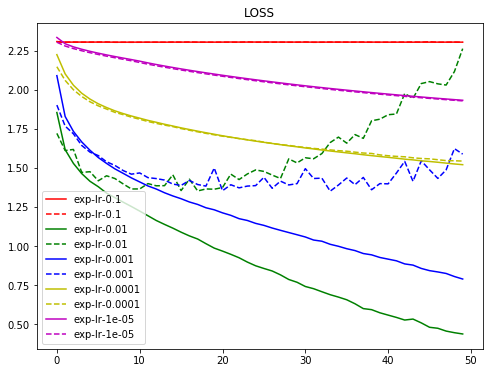

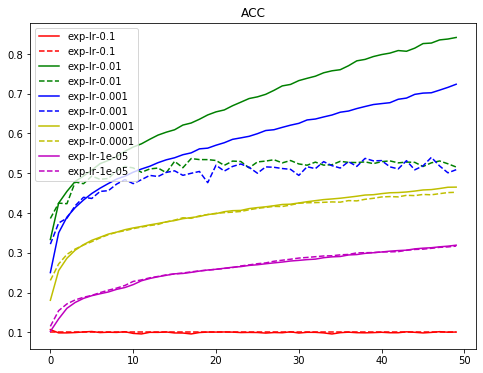

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
## LOSS
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize=(8,6))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])),results[cond]["train_loss"] ,'-', label = cond , color = color_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])),results[cond]["valid_loss"] ,'--', label = cond , color = color_bar[i])
plt.title("LOSS")
plt.legend()
plt.show()

## ACC

plt.figure(figsize=(8,6))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])),results[cond]["train_acc"] ,'-', label = cond , color = color_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])),results[cond]["valid_acc"] ,'--', label = cond , color = color_bar[i])
plt.title("ACC")
plt.legend()
plt.show()
    
    


## RMSprop

In [10]:
EPOCHS = 20
results = {}

"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(Input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = SGD(lr=lr,momentum=MOMENTUM,nesterov=True)
    optimizer = RMSprop(lr=lr)
    model.compile(loss = "categorical_crossentropy", metrics=['accuracy'],optimizer = optimizer)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)


    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc  = model.history.history["acc"]
    valid_acc  = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {"train_loss":train_loss,
                             "valid_loss":valid_loss,
                             "train_acc" :train_acc,
                             "valid_acc" :valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 64us/step - loss: 2.2037 - acc: 0.2099 - val_loss: 2.0114 - val_acc: 0.2438
Epoch 2/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.9096 - acc: 0.3067 - val_loss: 1.9545 - val_acc: 0.3176
Epoch 3/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.7992 - acc: 0.3496 - val_loss: 1.9324 - val_acc: 0.3208
Epoch 4/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.7323 - acc: 0.3803 - val_loss: 1.7968 - val_acc: 0.3415
Epoch 5/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.6753 - acc: 0.4006 - val_loss: 1.8025 - val_acc: 0.3540
Epoch 6/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.6276 - acc: 0.4171 - val_loss: 1.6351 - val_acc: 0.4103
Epoch 7/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.5852 - acc: 0.4329 - val_loss: 1.6240 - val_acc

50000/50000 [==============================] - 3s 60us/step - loss: 1.9784 - acc: 0.2954 - val_loss: 1.9329 - val_acc: 0.3256
Epoch 3/20
50000/50000 [==============================] - 3s 63us/step - loss: 1.9027 - acc: 0.3313 - val_loss: 1.8765 - val_acc: 0.3503
Epoch 4/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.8543 - acc: 0.3515 - val_loss: 1.8395 - val_acc: 0.3610
Epoch 5/20
50000/50000 [==============================] - 3s 60us/step - loss: 1.8172 - acc: 0.3655 - val_loss: 1.8051 - val_acc: 0.3701
Epoch 6/20
50000/50000 [==============================] - 3s 61us/step - loss: 1.7873 - acc: 0.3768 - val_loss: 1.7863 - val_acc: 0.3764
Epoch 7/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.7617 - acc: 0.3863 - val_loss: 1.7671 - val_acc: 0.3784
Epoch 8/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.7395 - acc: 0.3942 - val_loss: 1.7362 - val_acc: 0.3951
Epoch 9/20
50000/50000 [============================

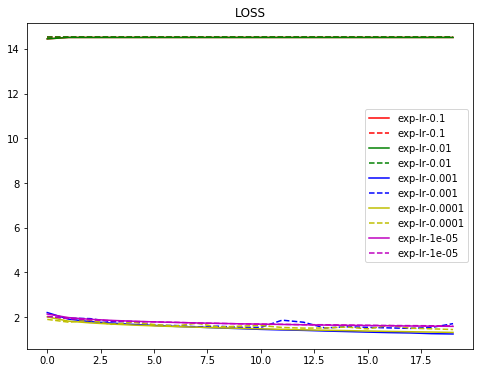

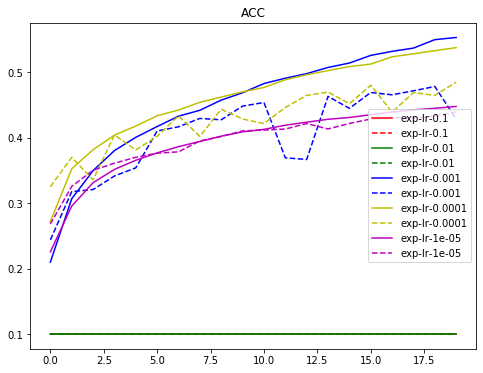

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
## LOSS
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize=(8,6))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])),results[cond]["train_loss"] ,'-', label = cond , color = color_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])),results[cond]["valid_loss"] ,'--', label = cond , color = color_bar[i])
plt.title("LOSS")
plt.legend()
plt.show()

## ACC

plt.figure(figsize=(8,6))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])),results[cond]["train_acc"] ,'-', label = cond , color = color_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])),results[cond]["valid_acc"] ,'--', label = cond , color = color_bar[i])
plt.title("ACC")
plt.legend()
plt.show()
    
    


# Adam

In [12]:
EPOCHS = 50
results = {}

"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(Input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = SGD(lr=lr,momentum=MOMENTUM,nesterov=True)
#     optimizer = RMSprop(lr=lr)
    optimizer = Adam(lr=lr)
    model.compile(loss = "categorical_crossentropy", metrics=['accuracy'],optimizer = optimizer)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)


    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc  = model.history.history["acc"]
    valid_acc  = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {"train_loss":train_loss,
                             "valid_loss":valid_loss,
                             "train_acc" :train_acc,
                             "valid_acc" :valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9361 - acc: 0.3009 - val_loss: 1.7713 - val_acc: 0.3768
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7269 - acc: 0.3886 - val_loss: 1.6651 - val_acc: 0.4093
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6434 - acc: 0.4196 - val_loss: 1.6333 - val_acc: 0.4154
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5849 - acc: 0.4383 - val_loss: 1.5730 - val_acc: 0.4440
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5415 - acc: 0.4556 - val_loss: 1.5256 - val_acc: 0.4584
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5058 - acc: 0.4669 - val_loss: 1.5076 - val_acc: 0.4597
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4731 - acc: 0.4776 - val_loss: 1.4775 - val_acc

50000/50000 [==============================] - 4s 72us/step - loss: 2.1288 - acc: 0.2362 - val_loss: 2.0038 - val_acc: 0.2829
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9392 - acc: 0.3187 - val_loss: 1.8895 - val_acc: 0.3430
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8548 - acc: 0.3507 - val_loss: 1.8277 - val_acc: 0.3537
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8021 - acc: 0.3677 - val_loss: 1.7846 - val_acc: 0.3729
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7634 - acc: 0.3823 - val_loss: 1.7539 - val_acc: 0.3819
Epoch 6/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.7337 - acc: 0.3929 - val_loss: 1.7239 - val_acc: 0.3959
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7070 - acc: 0.4018 - val_loss: 1.7015 - val_acc: 0.4040
Epoch 8/50
50000/50000 [============================

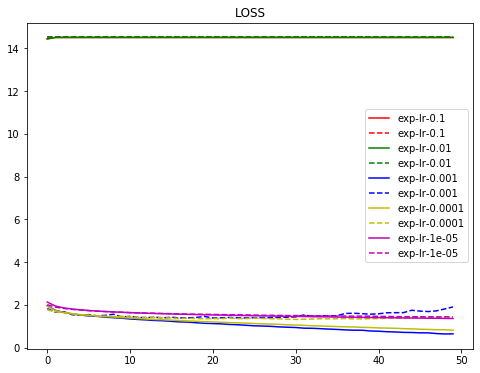

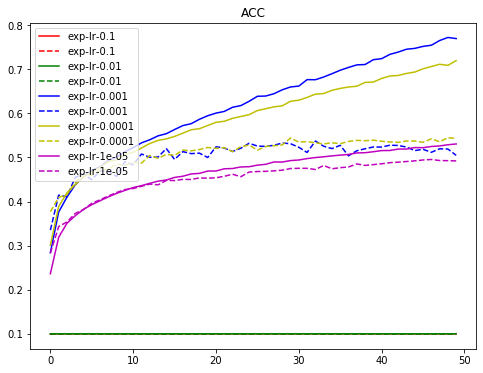

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
## LOSS
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize=(8,6))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])),results[cond]["train_loss"] ,'-', label = cond , color = color_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])),results[cond]["valid_loss"] ,'--', label = cond , color = color_bar[i])
plt.title("LOSS")
plt.legend()
plt.show()

## ACC

plt.figure(figsize=(8,6))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])),results[cond]["train_acc"] ,'-', label = cond , color = color_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])),results[cond]["valid_acc"] ,'--', label = cond , color = color_bar[i])
plt.title("ACC")
plt.legend()
plt.show()
    